<a href="https://colab.research.google.com/github/mateusdevmelo/ModerationFilterWithPython/blob/main/Developing_a_Content_Moderation_Filter_with_Python_Using_Twitter_and_OpenAI_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Developing a Content Moderation Filter with Python and AI



In [6]:
import os

os.environ["TWITTER_CONSUMER_KEY"] = "HIDDEN"
os.environ["TWITTER_CONSUMER_SECRET"] = "HIDDEN"

os.environ["OPENAI_API_KEY"] = "HIDDEN"

## Passo 1: Consumir Tweets (**E**xtract)
Nesta etapa, utilizaremos a API do Twitter para coletar tweets de um determinado username. Isso envolve autenticar com o Twitter e fazer duas requisições GET, primeiro para obter os dados do Usuário do Twitter e depois seus respectivos Tweets.

### Reflexão
A escolha de utilizar a API do Twitter é interessante para acessar dados em tempo real e de forma estruturada. A autenticação é um passo importante para garantir a segurança e conformidade com as diretrizes da API.

Por outro lado, para que isso não impacte os seus estudos (devido ao alto custo), existe a alternativa de mockar os dados (criando tweets fictícios para moderação). Isso não invalida de maneira alguma esta experiência educacional, abstraia a API do Twitter como uma mera fonte de dados, blz!?

### Links Úteis
- [Documentação da API do Twitter](https://developer.twitter.com/en/docs/twitter-api)
- [Autenticação na API do Twitter](https://developer.twitter.com/en/docs/authentication/overview)


### Alternativa Sem Custos: Mockar os Tweets 😉

In [12]:
# Alternativa Sem Custos: Mockar os Tweets (ou qualquer tipo de conteúdo passível de moderação).

tweets = [
    "Java é vida, delicinha demais!",
    "O código do @mateus é porco demais, pelo amor de Deus! Brinks ;)",
    "Chorando sangue aqui pra aprender Databricks, mas vou conseguir :D",
    "Se amar é crime, então eu sou traficante!",
    "Lebron, ladrão! Roubou meu coração <3",
    "A voz do Mateus é muito sensual, parabéns!"
]

## Passo 2: Moderar Tweets (**T**ransform)
Após coletar os tweets, usaremos a API da OpenAI (ou o pysentimiento) para moderar o conteúdo. O objetivo é identificar postagens inapropriadas com base em categorias predefinidas. Posteriormente, prepararemos os dados para visualização.

### Reflexão
A moderação automática de conteúdo via IA destaca a importância da responsabilidade ética no uso de tecnologias de inteligência artificial. Nesse sentido, o conceito de Porcessamento de Linguagem Natural (NPL) é fundamental para tais análises e categorizações.

### Links Úteis
- [API de Moderação da OpenAI](https://beta.openai.com/docs/guides/moderation)
- [pysentimiento](https://github.com/pysentimiento/pysentimiento) (open-source toolkit baseada em NPL)



### Alternativa Sem Custo: [pysentimiento](https://github.com/pysentimiento/pysentimiento) 🥰

In [13]:
# Alternativa Sem Custos: https://github.com/pysentimiento/pysentimiento

!pip install pysentimiento

from pysentimiento import create_analyzer

analyzer = create_analyzer(task="hate_speech", lang="pt")

def moderate_text(text):
    moderation = analyzer.predict(text)
    # Flag booleana usada para mapear sentimentos negativos considerando as tasks "sentiment" e "hate_speech".
    flagged = moderation.output == 'NEG' if isinstance(moderation.output, str) else len(moderation.output)
    return {
        "flagged": flagged,
        "categories": moderation.probas
    }

### Alternativa Paga*: API da OpenAI 🧐

In [ ]:
# Alternativa Paga: API da OpenAI (atualmente gratuito para monitorar as entradas e saídas das APIs OpenAI)
# https://platform.openai.com/docs/guides/moderation/overview

def moderate_text(text):
    try:
      headers = {"Authorization": f"Bearer {os.getenv('OPENAI_API_KEY')}"}
      response = requests.post(
          "https://api.openai.com/v1/moderations",
          headers=headers,
          json={"input": text}
      )
      response.raise_for_status()
      moderation = response.json()["results"][0]
      return {
          "flagged": moderation['flagged'],
          "categories": moderation['category_scores']
      }
    except requests.RequestException as e:
        raise Exception(f"Erro no consumo da API da OpenAI: {e}")

### Moderar/Transformar Tweets 🦋

In [14]:
# Moderar/Transformar os tweets, criando uma estrutura com "text" e "moderation"
moderated_tweets = []
for tweet in tweets:
  moderation = moderate_text(tweet)
  moderated_tweets.append({
      "text": tweet,
      "moderation": moderation
  })

print(*moderated_tweets, sep="\n")

{'text': 'Java é vida, delicinha demais!', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.006614838261157274, 'Body': 0.0018896429101005197, 'Racism': 0.0030320726800709963, 'Ideology': 0.0022431518882513046, 'Homophobia': 0.0036706740502268076}}}
{'text': 'O código do @mateus é porco demais, pelo amor de Deus! Brinks ;)', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.005629295948892832, 'Body': 0.0018805383006110787, 'Racism': 0.0032424202654510736, 'Ideology': 0.001985570415854454, 'Homophobia': 0.004264375194907188}}}
{'text': 'Chorando sangue aqui pra aprender Databricks, mas vou conseguir :D', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.004878189880400896, 'Body': 0.0017504116985946894, 'Racism': 0.0030344114638864994, 'Ideology': 0.0020372490398585796, 'Homophobia': 0.006045651156455278}}}
{'text': 'Se amar é crime, então eu sou traficante!', 'moderation': {'flagged': 0, 'categories': {'Sexism': 0.007734132464975119, 'Body': 0.0013701578136533499, '

## Passo 3: Visualizar Dados (**L**oad)

Após a moderação dos tweets, a próxima etapa do nosso ETL (Extract, Transform, Load) envolve a visualização dos dados. Esta etapa é crucial para apresentar as informações de maneira clara e interativa, permitindo uma análise detalhada do conteúdo moderado.

Utilizamos o Pandas para organizar os dados e o Matplotlib para criar gráficos de barras representando as categorias de moderação de cada tweet. Cada gráfico destaca se o tweet foi marcado (flagged) como inapropriado, usando cores diferentes para uma distinção imediata. Este método visual ajuda a destacar rapidamente os tweets que requerem atenção especial.

### Reflexão
A visualização de dados é uma poderosa ferramenta para compreender grandes conjuntos de dados e extrair insights significativos. Ao visualizar o conteúdo moderado dos tweets, podemos identificar padrões, tendências e outliers de forma eficiente. Isso não apenas ajuda a avaliar a eficácia da moderação automática, mas também fornece uma perspectiva clara sobre o comportamento e as preferências dos usuários na plataforma.

### Links Úteis
- [Documentação do Matplotlib](https://matplotlib.org/stable/contents.html)
- [Documentação do Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)

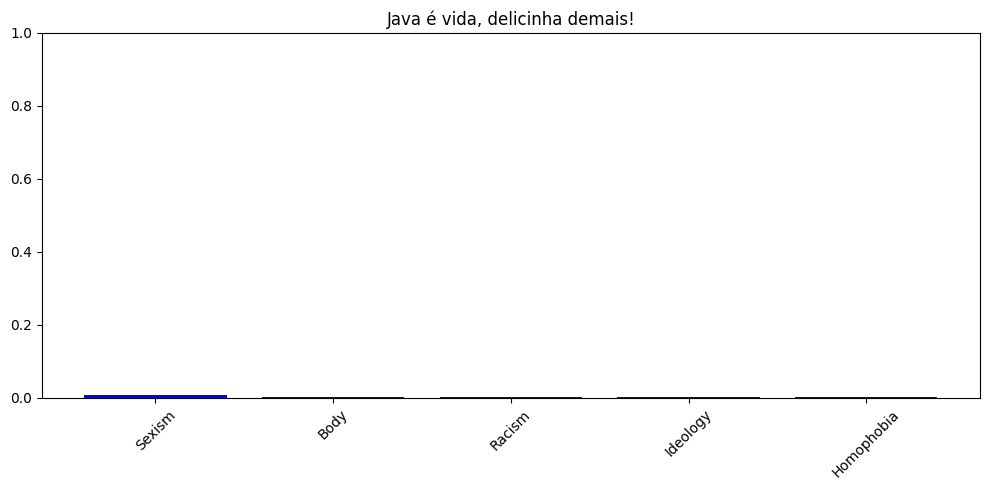

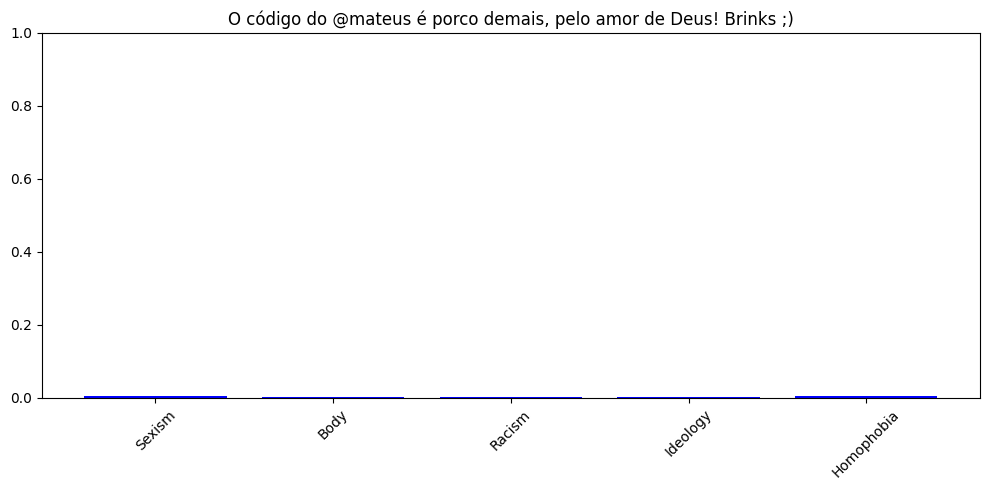

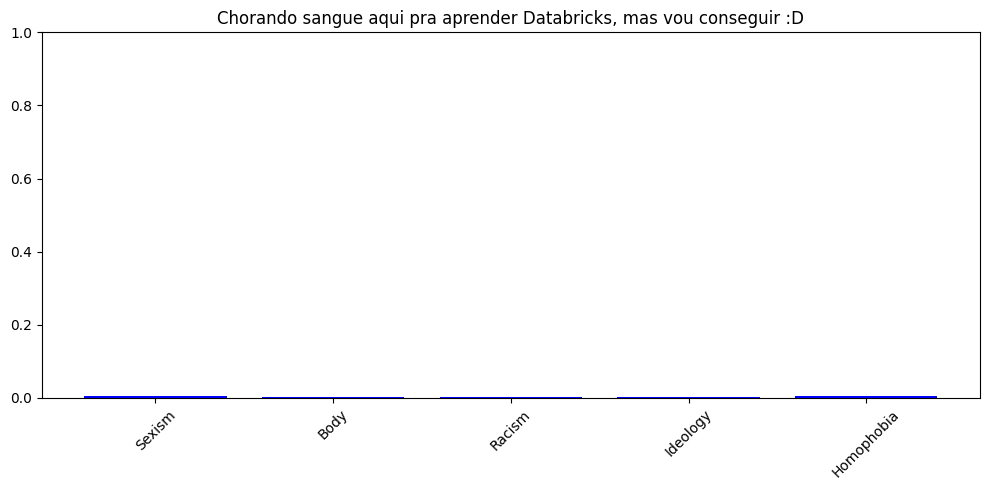

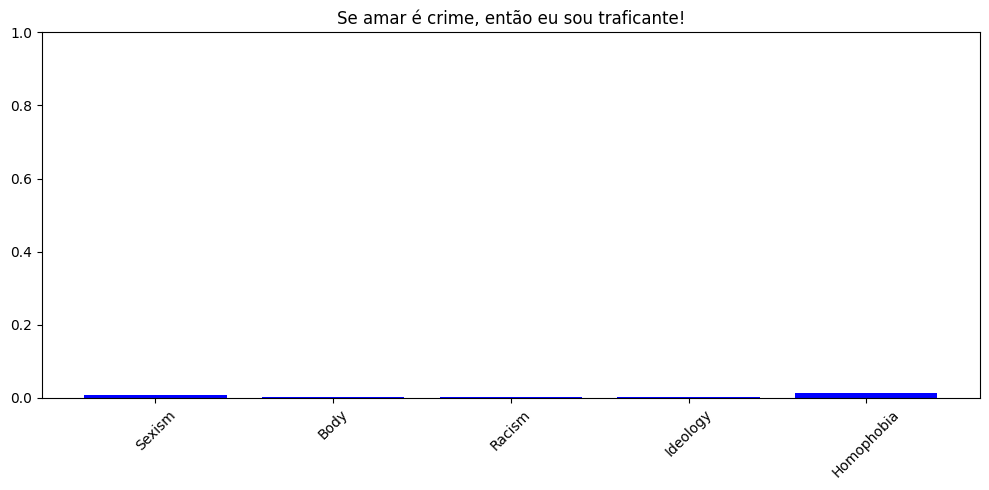

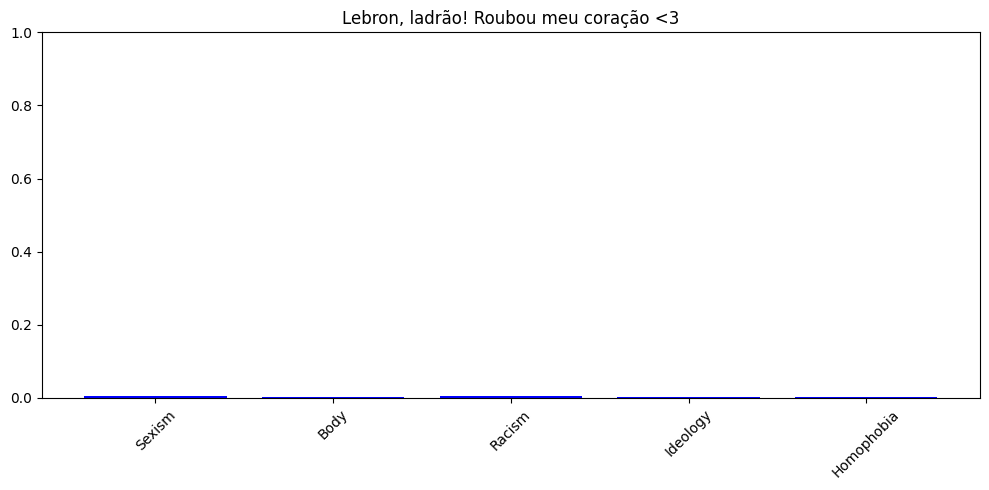

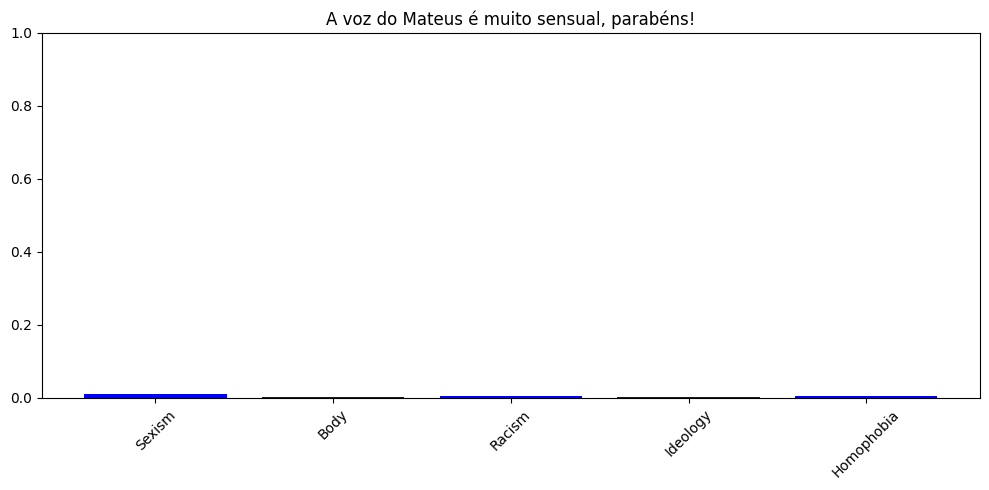

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Criando um gráfico de barras para cada mensagem
for i, tweet in enumerate(moderated_tweets):
    categories = tweet['moderation']['categories']
    flagged = tweet['moderation']['flagged']

    plt.figure(figsize=(10, 5))
    bars = plt.bar(categories.keys(), categories.values(), color='red' if flagged else 'blue')

    # Adicionando título e ajustando o layout
    plt.title(tweet["text"])
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Fixando o valor máximo em 1
    plt.tight_layout()

    # Exibindo o gráfico
    plt.show()
